In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df['car_ID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
df.drop("car_ID",axis=1,inplace=True)

In [7]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
df['symboling'] = df['symboling'].apply(lambda x: str(x))
df['symboling'] = df['symboling'].str.replace('-1', '4')
df['symboling'] = df['symboling'].str.replace('-2', '5')
df['symboling'] = df['symboling'].apply(lambda x: int(x))
df['symboling'].unique()

array([3, 1, 2, 0, 4, 5], dtype=int64)

In [9]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
car_name=df['CarName'].str.split(" ", n = 1, expand = True)
df['CarName']=car_name[0]

In [11]:
car_name=df['CarName'].str.split("-", n = 1, expand = True)
df['CarName']=car_name[0]

In [12]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:

la = LabelEncoder()
df['CarName'] = la.fit_transform(df['CarName'])

In [15]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [17]:
#one hot encoding
fuel = pd.get_dummies(df['fueltype'], prefix = 'fueltype' ,drop_first=True)
df = pd.concat((df,fuel),axis=1)
df.drop('fueltype',axis=1,inplace=True)
df.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,2,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,2,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [18]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [19]:
#One hot encoding of aspiration
aspi = pd.get_dummies(df['aspiration'], prefix = 'aspiration' ,drop_first=True)
df = pd.concat((df,aspi),axis=1)
df.drop('aspiration',axis=1,inplace=True)
df.head()

,symboling,CarName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo
0,3,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,3,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,2,2,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,2,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0


In [20]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [21]:
#one hot encdoing of doornumber
door = pd.get_dummies(df['doornumber'], prefix = 'doornumber' ,drop_first=True)
df = pd.concat((df,door),axis=1)
df.drop('doornumber',axis=1,inplace=True)
df.head()

,symboling,CarName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two
0,3,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,1,0,1
1,3,1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,1,0,1
2,1,1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,1,0,1
3,2,2,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,2,2,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [22]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [23]:
df['carbody'] = la.fit_transform(df['carbody'])

In [24]:
df.head()

,symboling,CarName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two
0,3,1,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,1,0,1
1,3,1,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,1,0,1
2,1,1,2,rwd,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,1,0,1
3,2,2,3,fwd,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,2,2,3,4wd,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [25]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [26]:
df['drivewheel'] = la.fit_transform(df['drivewheel'])
df.head()

,symboling,CarName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two
0,3,1,0,2,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,1,0,1
1,3,1,0,2,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,1,0,1
2,1,1,2,2,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,1,0,1
3,2,2,3,1,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,1,0,0
4,2,2,3,0,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [27]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [28]:
#one hot encdoing of enginelocation
el= pd.get_dummies(df['enginelocation'], prefix = 'enginelocation', drop_first=True)    
df = pd.concat((df,el),axis=1)
df.drop('enginelocation',axis=1,inplace=True)
df.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,3,1,0,2,88.6,168.8,64.1,48.8,2548,dohc,...,9.0,111,5000,21,27,13495.0,1,0,1,0
1,3,1,0,2,88.6,168.8,64.1,48.8,2548,dohc,...,9.0,111,5000,21,27,16500.0,1,0,1,0
2,1,1,2,2,94.5,171.2,65.5,52.4,2823,ohcv,...,9.0,154,5000,19,26,16500.0,1,0,1,0
3,2,2,3,1,99.8,176.6,66.2,54.3,2337,ohc,...,10.0,102,5500,24,30,13950.0,1,0,0,0
4,2,2,3,0,99.4,176.6,66.4,54.3,2824,ohc,...,8.0,115,5500,18,22,17450.0,1,0,0,0


In [29]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [30]:
df['enginetype'] = la.fit_transform(df['enginetype'])
df.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,13495.0,1,0,1,0
1,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,16500.0,1,0,1,0
2,1,1,2,2,94.5,171.2,65.5,52.4,2823,5,...,9.0,154,5000,19,26,16500.0,1,0,1,0
3,2,2,3,1,99.8,176.6,66.2,54.3,2337,3,...,10.0,102,5500,24,30,13950.0,1,0,0,0
4,2,2,3,0,99.4,176.6,66.4,54.3,2824,3,...,8.0,115,5500,18,22,17450.0,1,0,0,0


In [31]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [32]:
df['cylindernumber'] = la.fit_transform(df['cylindernumber'])
df.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,13495.0,1,0,1,0
1,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,16500.0,1,0,1,0
2,1,1,2,2,94.5,171.2,65.5,52.4,2823,5,...,9.0,154,5000,19,26,16500.0,1,0,1,0
3,2,2,3,1,99.8,176.6,66.2,54.3,2337,3,...,10.0,102,5500,24,30,13950.0,1,0,0,0
4,2,2,3,0,99.4,176.6,66.4,54.3,2824,3,...,8.0,115,5500,18,22,17450.0,1,0,0,0


In [33]:
df['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [34]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [35]:
df['fuelsystem'] = la.fit_transform(df['fuelsystem'])
df.head()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,13495.0,1,0,1,0
1,3,1,0,2,88.6,168.8,64.1,48.8,2548,0,...,9.0,111,5000,21,27,16500.0,1,0,1,0
2,1,1,2,2,94.5,171.2,65.5,52.4,2823,5,...,9.0,154,5000,19,26,16500.0,1,0,1,0
3,2,2,3,1,99.8,176.6,66.2,54.3,2337,3,...,10.0,102,5500,24,30,13950.0,1,0,0,0
4,2,2,3,0,99.4,176.6,66.4,54.3,2824,3,...,8.0,115,5500,18,22,17450.0,1,0,0,0


In [36]:
df.describe()

,symboling,CarName,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,1.473171,14.468293,2.614634,1.326829,98.756585,174.049268,65.907805,53.724878,2555.565854,3.014634,...,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.902439,0.180488,0.439024,0.014634
std,1.412657,7.486931,0.859081,0.556171,6.021776,12.337289,2.145204,2.443522,520.680204,1.054765,...,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.297446,0.385535,0.497483,0.120377
min,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,2.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.000000,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,14.000000,3.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.000000,...,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,22.000000,3.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.000000,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,27.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,6.000000,...,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
X = df.drop('price', axis=1)
Y = df['price']

In [39]:
sc = StandardScaler()
x_scale = sc.fit_transform(X)
x_scale

array([[ 1.08346667, -1.80331069, -3.05097525, ..., -0.46929532,
         1.13038833, -0.12186667],
       [ 1.08346667, -1.80331069, -3.05097525, ..., -0.46929532,
         1.13038833, -0.12186667],
       [-0.33577082, -1.80331069, -0.71720687, ..., -0.46929532,
         1.13038833, -0.12186667],
       ...,
       [ 1.79308541,  1.54401539,  0.44967732, ..., -0.46929532,
        -0.88465174, -0.12186667],
       [ 1.79308541,  1.54401539,  0.44967732, ...,  2.13085442,
        -0.88465174, -0.12186667],
       [ 1.79308541,  1.54401539,  0.44967732, ...,  2.13085442,
        -0.88465174, -0.12186667]])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, Y, test_size=0.25, random_state=22)

In [41]:
liner_model = LinearRegression()
liner_model.fit(x_train,y_train)


LinearRegression()

In [42]:
liner_model.score(x_test, y_test)

0.8690330309027973

In [43]:
liner_model.score(x_train,y_train)

0.895924594363156

In [44]:
prediction = liner_model.predict(x_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

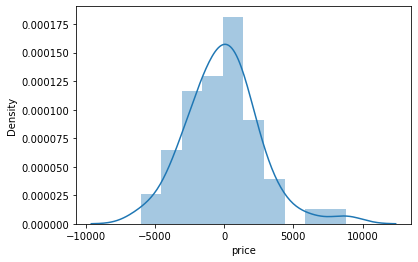

In [45]:
sns.distplot(y_test-prediction)

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
decre = DecisionTreeRegressor()

In [50]:
decre.fit(x_train,y_train)

DecisionTreeRegressor()

In [51]:
decre.score(x_test, y_test)

0.9329849001982913

In [71]:
import pickle

In [72]:
file = open('decre.pkl', 'wb')
pickle.dump(decre, file)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr = RandomForestRegressor()

In [76]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [77]:
rfr.score(x_test,y_test)

0.9301971518174315